In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
df = pd.read_csv('investments_VC.csv', encoding= 'unicode_escape')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [31]:
# For the purpose of analysis we can safely exclude the permalink and url from our dataframe as they arent likely to shed any useful analysis.  
df.drop(columns=['permalink','homepage_url'], inplace=True)

In [32]:
df.shape

(54294, 37)

In [33]:
df.isna().sum()

name                     4857
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E   

In [44]:
df.dropna(subset=['name', 'funding_rounds'], inplace=True)
df.isna().sum().sort_values(ascending=False)

state_code              19276
founded_quarter         10956
founded_month           10956
founded_year            10956
founded_at              10884
city                     6115
country_code             5272
region                   5272
 market                  3968
category_list            3961
status                   1314
round_B                     0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
name                        0
round_C                     0
round_D                     0
round_E                     0
private_equity              0
round_F                     0
round_G                     0
post_ipo_equity             0
equity_crowdfunding         0
grant                       0
angel                       0
debt_financing              0
convertible_note            0
undisclosed                 0
venture                     0
seed                        0
last_funding_at             0
first_fund

We were looking at ~5000 incomplete rows which would have added a lot of noise to our analysis. As the name and # of funding rounds are pivotal information with regards to what we're looking for, we can drop cols where those values are both missing. We can work around the founded dates being incomplete.

In [48]:
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


In [53]:
df.columns = df.columns.str.strip()
df.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

Summary statistics for 'funding_total_usd':
count     49437
unique    14617
top        -   
freq       8531
Name: funding_total_usd, dtype: object


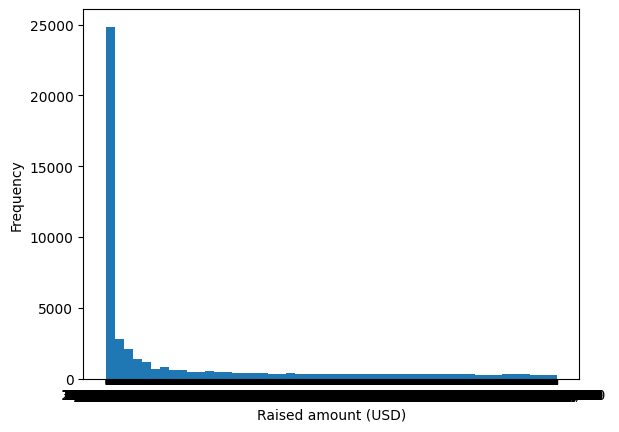

In [58]:
# Check for extremities in 'raised_amount_usd' column
print("Summary statistics for 'funding_total_usd':")
print(df['funding_total_usd'].describe())

# Visualize distribution of 'raised_amount_usd'
plt.hist(df['funding_total_usd'], bins=50)
plt.xlabel('Raised amount (USD)')
plt.ylabel('Frequency')
plt.show()



To speed up the analysis, we'll take a sample of the data set

In [62]:
sample_df = df.sample(n=1000, random_state=42)

Summary statistics for 'funding_total_usd':
count      1000
unique      535
top        -   
freq        156
Name: funding_total_usd, dtype: object


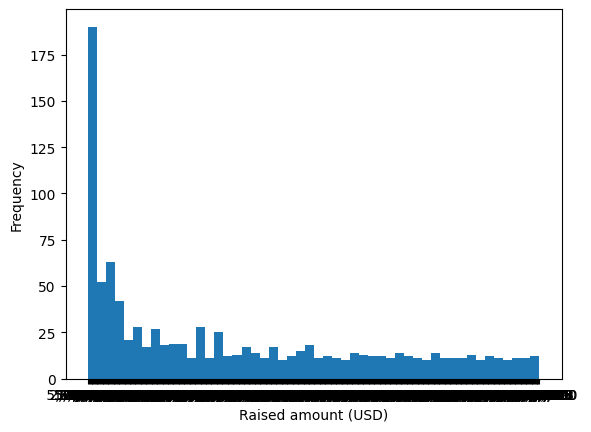

In [63]:
# Check for extremities in 'raised_amount_usd' column
print("Summary statistics for 'funding_total_usd':")
print(sample_df['funding_total_usd'].describe())

# Visualize distribution of 'raised_amount_usd'
plt.hist(sample_df['funding_total_usd'], bins=50)
plt.xlabel('Raised amount (USD)')
plt.ylabel('Frequency')
plt.show()



In [51]:
# Visualize distribution of 'raised_amount_usd'
plt.hist(df['funding_total_usd'], bins=50)
plt.xlabel('Raised amount (USD)')
plt.ylabel('Frequency')
plt.show()

# Check for extremities in 'founded_year' column
print("Summary statistics for 'founded_year':")
print(df['founded_year'].describe())

# Visualize distribution of 'founded_year'
plt.hist(df['founded_year'].dropna(), bins=50)
plt.xlabel('Founded year')
plt.ylabel('Frequency')
plt.show()

Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')